# Module 2: Peer Reviewed Assignment

### Outline:
The objectives for this assignment:

1. Mathematically derive the values of $\hat{\beta}_0$ and $\hat{\beta}_1$
2. Enhance our skills with linear regression modeling.
3. Learn the uses and limitations of RSS, ESS, TSS and $R^2$.
4. Analyze and interpret nonidentifiability.

General tips:

1. Read the questions carefully to understand what is being asked.
2. This work will be reviewed by another human, so make sure that you are clear and concise in what your explanations and answers.

In [1]:
# Load Required Packages
library(RCurl) #a package that includes the function getURL(), which allows for reading data from github.
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.0     ✔ purrr   0.3.4
✔ tibble  3.0.1     ✔ dplyr   0.8.5
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::complete() masks RCurl::complete()
✖ dplyr::filter()   masks stats::filter()
✖ dplyr::lag()      masks stats::lag()



## Problem 1: Maximum Likelihood Estimates (MLEs)

Consider the simple linear regression model $Y_i = \beta_0 + \beta_1x_i + \varepsilon_i$ for $i = 1,...,n$, $\,\,\,\varepsilon_i \sim N(0,\sigma^2)$. In the videos, we showed that the least squares estimator in matrix-vector form is $\mathbf{\widehat{\beta}} = (\beta_0, \beta_1)^T = (X^TX)^{-1}X^T\mathbf{Y}$. In this problem, you will derive the least squares estimators for simple linear regression without (explicitly) using linear algebra.

Least squares requires that we minimize $$f(\mathbf{x}; \beta_0, \beta_1) = \sum^n_{i=1}\bigg(Y_i - [\beta_0 + \beta_1x_i] \bigg)^2$$ over $\beta_0$ and $\beta_1$. 

#### 1. (a) Taking Derivatives

Find the partial derivative of $f(\mathbf{x}; \beta_0, \beta_1)$ with respect to $\beta_0$, and the partial derivative of $f(\mathbf{x}; \beta_0, \beta_1)$ with respect to $\beta_1$. Recall that the partial derivative with respect to $x$ of a multivariate function $h(x,y)$ is calculated by taking the derivative  of $h$ with respect to $x$ while treating $y$ constant.

To derive the least squares estimators for simple linear regression, we start by minimizing the function:

$\
f(\mathbf{x}; \beta_0, \beta_1) = \sum_{i=1}^n \left( Y_i - (\beta_0 + \beta_1 x_i) \right)^2
$

### 1. (a) Taking Derivatives

**Partial derivative with respect to $\(\beta_0\$):**

$
\frac{\partial f}{\partial \beta_0} = \sum_{i=1}^n -2 \left( Y_i - (\beta_0 + \beta_1 x_i) \right)
$

This simplifies to:

$
\frac{\partial f}{\partial \beta_0} = -2 \sum_{i=1}^n \left( Y_i - \beta_0 - \beta_1 x_i \right)
$

**Partial derivative with respect to $\(\beta_1\$):**

$
\frac{\partial f}{\partial \beta_1} = \sum_{i=1}^n -2 x_i \left( Y_i - (\beta_0 + \beta_1 x_i) \right)
$

This simplifies to:

$
\frac{\partial f}{\partial \beta_1} = -2 \sum_{i=1}^n x_i \left( Y_i - \beta_0 - \beta_1 x_i \right)
$



#### 1. (b) Solving for $\hat{\beta}_0$ and $\hat{\beta}_1$

Use **1. (a)** to find the minimizers,  $\widehat{\beta}_0$ and $\widehat{\beta}_1$, of $f$. That is, set each partial derivative to zero and solve for $\beta_0$ and $\beta_1$. In particular, show

$$
\widehat{\beta}_1 = \frac{\sum^n_{i=1}(x_i - \bar{x})(Y_i -\bar{Y})}{\sum^n_{i=1}(x_i - \bar{x})^2} 
\qquad \text{ and } \qquad
\widehat{\beta}_0 = \bar{Y} - \widehat{\beta}_1\bar{x}
$$

Set the partial derivatives to zero:

1. For $(\beta_0)$:

$
-2 \sum_{i=1}^n (Y_i - \beta_0 - \beta_1 x_i) = 0
$

$
\sum_{i=1}^n Y_i = n \beta_0 + \beta_1 \sum_{i=1}^n x_i
$

2. For $(\beta_1$):

$
-2 \sum_{i=1}^n x_i (Y_i - \beta_0 - \beta_1 x_i) = 0
$

$
\sum_{i=1}^n x_i Y_i = \beta_0 \sum_{i=1}^n x_i + \beta_1 \sum_{i=1}^n x_i^2
$

1. Rearranging the first equation:

$
\sum_{i=1}^n Y_i = n \beta_0 + \beta_1 \sum_{i=1}^n x_i
$

This implies:

$
\beta_0 = \frac{\sum_{i=1}^n Y_i}{n} - \beta_1 \frac{\sum_{i=1}^n x_i}{n}
$

2. Rearranging the second equation:

$
\sum_{i=1}^n x_i Y_i = \beta_0 \sum_{i=1}^n x_i + \beta_1 \sum_{i=1}^n x_i^2
$

Substituting ($\beta_0$) from the first equation:

$
\sum_{i=1}^n x_i Y_i = \left( \frac{\sum_{i=1}^n Y_i}{n} - \beta_1 \frac{\sum_{i=1}^n x_i}{n} \right) \sum_{i=1}^n x_i + \beta_1 \sum_{i=1}^n x_i^2
$

Simplify:

$
\sum_{i=1}^n x_i Y_i = \frac{\sum_{i=1}^n Y_i \sum_{i=1}^n x_i}{n} - \beta_1 \frac{(\sum_{i=1}^n x_i)^2}{n} + \beta_1 \sum_{i=1}^n x_i^2
$

Combine terms:

$
\sum_{i=1}^n x_i Y_i - \frac{\sum_{i=1}^n Y_i \sum_{i=1}^n x_i}{n} = \beta_1 \left( \sum_{i=1}^n x_i^2 - \frac{(\sum_{i=1}^n x_i)^2}{n} \right)
$

This can be rewritten using the means:

$
\beta_1 = \frac{\sum_{i=1}^n (x_i - \bar{x})(Y_i - \bar{Y})}{\sum_{i=1}^n (x_i - \bar{x})^2}
$

Where:

$
\bar{x} = \frac{\sum_{i=1}^n x_i}{n}, \quad \bar{Y} = \frac{\sum_{i=1}^n Y_i}{n}
$

Then:

$
\beta_0 = \bar{Y} - \beta_1 \bar{x}
$

Thus, the estimators are:

$$
\widehat{\beta}_1 = \frac{\sum_{i=1}^n (x_i - \bar{x})(Y_i - \bar{Y})}{\sum_{i=1}^n (x_i - \bar{x})^2}
$$

$$
\widehat{\beta}_0 = \bar{Y} - \widehat{\beta}_1 \bar{x}
$$

## Problem 2: Oh My Goodness of Fit!

In the US, public schools have been slowly increasing class sizes over the last 15 years [https://stats.oecd.org/Index.aspx?DataSetCode=EDU_CLASS]. The general cause for this is because it saves money to have more kids per teacher. But how much money does it save? Let's use some of our new regression skills to try and figure this out. Below is an explanation of the variables in the dataset.

Variables/Columns:  
School  
Per-Pupil Cost  (Dollars)   
Average daily Attendance   
Average Monthly Teacher Salary (Dollars)  
Percent Attendance       
Pupil/Teacher ratio   

Data Source: E.R. Enlow (1938). "Do Small Schools Mean Large Costs?," Peabody Journal of Educaltion, Vol. 16, \#1, pp. 1-11

In [2]:
school.data = read_table("school.dat")
names(school.data) = c("school", "cost", "avg.attendance", "avg.salary", "pct.attendance", "pup.tch.ratio")
head(school.data)
dim(school.data)

Parsed with column specification:
cols(
  Adair = col_character(),
  `66.90` = col_double(),
  `451.4` = col_double(),
  `160.22` = col_double(),
  `90.77` = col_double(),
  `33.8` = col_double()
)



school,cost,avg.attendance,avg.salary,pct.attendance,pup.tch.ratio
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Calhoun,108.57,219.1,161.79,89.86,23.0
Capitol View,70.00,268.9,136.37,92.44,29.4
Connally,49.04,161.7,106.86,92.01,29.4
Couch,71.51,422.1,147.17,91.60,29.2
Crew,61.08,440.6,146.24,89.32,36.3
Davis,105.21,139.4,159.79,86.51,22.6


[1] 43  6

#### 2. (a) Create a model

Begin by creating two figures for your model. The first with `pup.tch.ratio` on the x-axis and `cost` on the y-axis. The second with `avg.salary` on the x-axis and `cost` on the y-axis. Does there appear to be a relation between these two predictors and the response.

Then fit a multiple linear regression model with `cost` as the response and `pup.tch.ratio` and `avg.salary` as predictors.

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



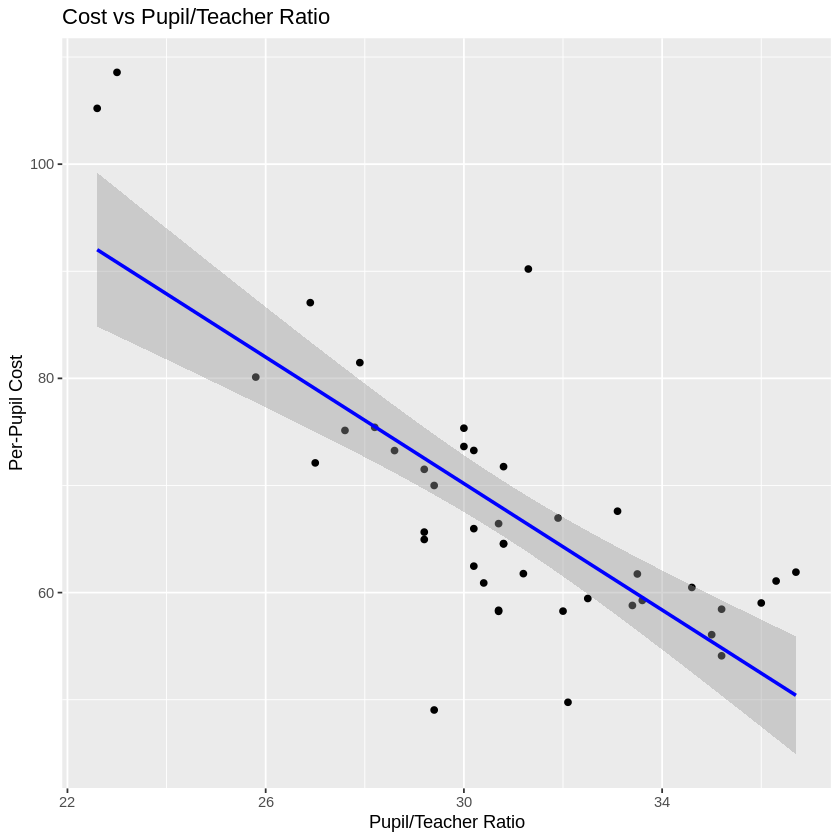

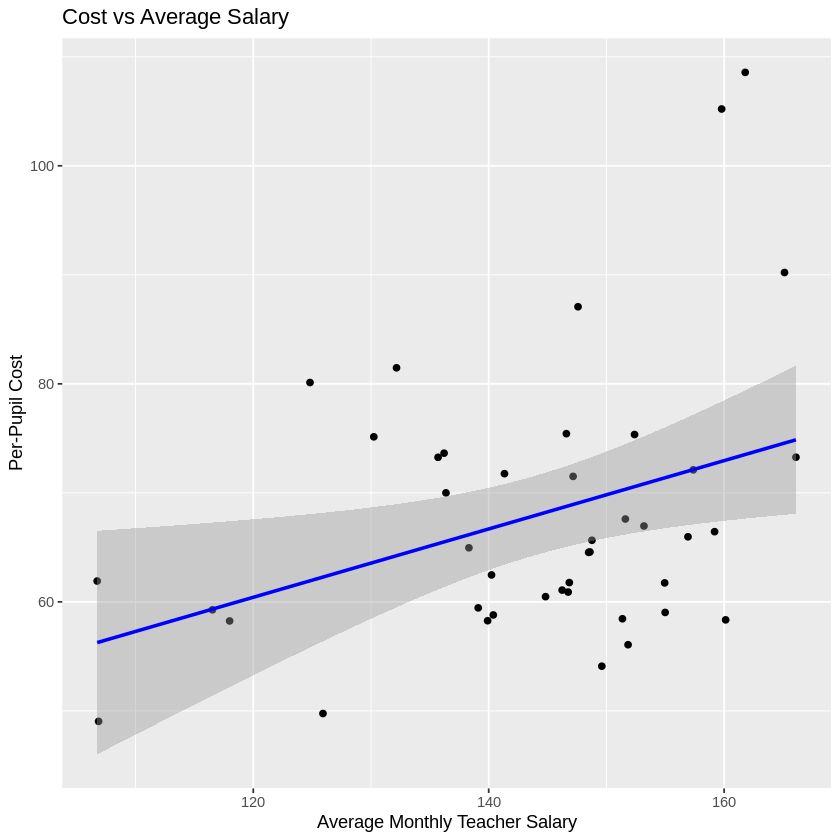

In [3]:
# Plotting
ggplot(school.data, aes(x = pup.tch.ratio, y = cost)) +
  geom_point() +
  geom_smooth(method = "lm", col = "blue") +
  labs(title = "Cost vs Pupil/Teacher Ratio", x = "Pupil/Teacher Ratio", y = "Per-Pupil Cost")

ggplot(school.data, aes(x = avg.salary, y = cost)) +
  geom_point() +
  geom_smooth(method = "lm", col = "blue") +
  labs(title = "Cost vs Average Salary", x = "Average Monthly Teacher Salary", y = "Per-Pupil Cost")

In [4]:
# Fit the multiple linear regression model
model <- lm(cost ~ pup.tch.ratio + avg.salary, data = school.data)
summary(model)


Call:
lm(formula = cost ~ pup.tch.ratio + avg.salary, data = school.data)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.8290  -5.2752  -0.8332   3.8253  19.6986 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   120.23756   17.73230   6.781 3.79e-08 ***
pup.tch.ratio  -2.82585    0.37714  -7.493 3.90e-09 ***
avg.salary      0.24061    0.08396   2.866   0.0066 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.721 on 40 degrees of freedom
Multiple R-squared:  0.6372,	Adjusted R-squared:  0.6191 
F-statistic: 35.13 on 2 and 40 DF,  p-value: 1.559e-09


#### 2. (b) RSS, ESS and TSS

In the code block below, manually calculate the RSS, ESS and TSS for your MLR model. Print the results.

In [5]:
# Predicted values and residuals
predicted_values <- predict(model)
residuals <- school.data$cost - predicted_values

# Calculate RSS
RSS <- sum(residuals^2)

# Calculate TSS
TSS <- sum((school.data$cost - mean(school.data$cost))^2)

# Calculate ESS
ESS <- TSS - RSS

# Print the results
cat("RSS:", RSS, "\n")
cat("ESS:", ESS, "\n")
cat("TSS:", TSS, "\n")


RSS: 2384.597 
ESS: 4188.568 
TSS: 6573.165 


#### 2. (c) Are you Squared?

Using the values from **2.b**, calculate the $R^2$ value for your model. Check your results with those produced from the `summary()` statement of your model.

In words, describe what this value means for your model.

In [6]:
# Calculate R^2
R_squared <- ESS / TSS
cat("R^2:", R_squared, "\n")

R^2: 0.6372224 


The $R^2$ value of 0.6372 means that approximately 63.72% of the variance in per-pupil cost is explained by the pupil/teacher ratio and average teacher salary. This suggests a moderately strong relationship between the predictors and the response variable.

#### 2. (d) Conclusions

Describe at least two advantages and two disadvantages of the $R^2$ value.

Advantages of $R^2$:

- Simple Interpretation: Provides an easy-to-understand metric for the proportion of variance explained by the model.
- Comparison: Useful for comparing the goodness of fit between different models.

Disadvantages of $R^2$:

- Not Always Indicative of Fit: A high $R^2$ does not necessarily indicate a good model fit, especially with non-linear relationships.
- Influence of Outliers: Sensitive to outliers, which can artificially inflate or deflate the $R^2$ value.

# Problem 3: Identifiability

**This problem might require some outside-of-class research if you haven't taken a linear algebra/matrix methods course.**

Matrices and vectors play an important role in linear regression. Let's review some matrix theory as it might relate to linear regression.

Consider the system of linear equations 

\begin{equation} 
Y_i = \beta_0 + \sum^p_{j=1}\beta_j x_{i,j} + \varepsilon_i,
\end{equation}
for $i = 1,...,n$, where $n$ is the number of data points (measurements in the sample), and $j = 1,...,p$, where 

1. $p+1$ is the number of parameters in the model. 
2. $Y_i$ is the $i^{th}$ measurement of the *response variable*.
3. $x_{i,j}$ is the $i^{th}$ measurement of the $j^{th}$ *predictor variable*.
4. $\varepsilon_i$ is the $i^{th}$ *error term* and is a random variable, often assumed to be $N(0, \sigma^2)$. 
5. $\beta_j$, $j = 0,...,p$ are *unknown parameters* of the model. We hope to estimate these, which would help us characterize the relationship between the predictors and response.

#### 3. (a) MLR Matrix Form

Write the equation above in matrix vector form. Call the matrix including the predictors $X$, the vector of $Y_i$s $\mathbf{Y}$, the vector of parameters $\mathbf{\beta}$, and the vector of error terms $\mathbf{\varepsilon}$. (This is more LaTeX practice than anything else...)**

The multiple linear regression (MLR) equation in matrix form can be written as:
$$Y=Xβ+ε$$


Where:

$Y$ is the response vector:
    
$Y$ = $ Vector[Y1, Y2⋮Yn]$



$X$ is the matrix of predictors, including a column of ones for $\beta_0$:

$X$ = $ Vector [1x1,1x1,2⋯x1,p1x2,1x2,2⋯x2,p ⋮ 1xn,1xn,2⋯xn,p] $


$\beta$ is the vector of parameters:

$β$ = $ Vector[β0, β1⋮ βp] $


$ε$ is the vector of error terms:


$ε$ =$ Vector [ε1ε2⋮εn] $


#### 3. (b) Properties of this matrix

In lecture, we will find that the OLS estimator for $\mathbf{\beta}$ in MLR is $\widehat{\boldsymbol\beta} = (X^TX)^{-1}X^T\mathbf{Y}$. Use this knowledge to answer the following questions:


1. What condition must be true about the columns of $X$ for the "Gram" matrix $X^TX$ to be invertible? 

2. What does this condition mean in practical terms, i.e., does $X$ contain a deficiency or redundancy?

3. Suppose that the number of measurements ($n$) is less than the number of model parameters ($p+1$). What does this say about the invertibility of $X^TX$? What does this mean on a practical level?

4. What is true about about $\widehat{\boldsymbol\beta}$ if $X^TX$ is not invertible?

Condition for Invertibility of $X^TX$:

- The columns of X must be linearly independent. This means that no column can be expressed as a linear combination of the other columns.

Practical Meaning of the Condition:

- If the columns are linearly dependent, it means there is redundancy in the predictors. Practically, this could occur if one predictor can be exactly predicted from others (e.g., multicollinearity).

Case When $n<p+1$:

- If the number of measurements nn is less than the number of parameters $p+1$, $X^TX$ will not be invertible. This is because there aren’t enough data points to estimate the parameters uniquely, leading to a rank deficiency.

Implications if $X^TX$ is Not Invertible:

- If $X^TX$ is not invertible, the ordinary least squares (OLS) estimator $β^$ = $((X^TX)^-1)X^TY$ cannot be computed directly. This means the estimates are not unique, and there are infinitely many solutions. In practice, methods such as ridge regression or adding a regularization term can be used to address this issue.

## Problem 4: Downloading...

The following [data](https://dasl.datadescription.com/datafile/downloading/) were collected to see if time of day madea difference on file download speed. A researcher placed a file on a remote server and then proceeded to download it at three different time periods of the day. They downloaded the file 48 times in all, 16 times at each Time of Day (`time`), and recorded the Time in seconds (`speed`) that the download took.

#### 4. (a) Initial Observations

The `downloading` data is loaded in and cleaned for you. Using `ggplot`, create a boxplot of `speed` vs. `time`. Make some basic observations about the three categories.

In [7]:
# Load in the data and format it
downloading = read.csv("downloading.txt", sep="\t")
names(downloading) = c("time", "speed")
# Change the types of brand and form to categories, instead of real numbers
downloading$time = as.factor(downloading$time)
summary(downloading)

                 time        speed      
 Early (7AM)       :16   Min.   : 68.0  
 Evening (5 PM)    :16   1st Qu.:129.8  
 Late Night (12 AM):16   Median :198.0  
                         Mean   :193.2  
                         3rd Qu.:253.0  
                         Max.   :367.0  

In [8]:
summary(lm(speed ~ time, data = downloading))


Call:
lm(formula = speed ~ time, data = downloading)

Residuals:
    Min      1Q  Median      3Q     Max 
-83.312 -34.328  -5.187  26.250 103.625 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)              113.37      11.79   9.619 1.73e-12 ***
timeEvening (5 PM)       159.94      16.67   9.595 1.87e-12 ***
timeLate Night (12 AM)    79.69      16.67   4.781 1.90e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 47.15 on 45 degrees of freedom
Multiple R-squared:  0.6717,	Adjusted R-squared:  0.6571 
F-statistic: 46.03 on 2 and 45 DF,  p-value: 1.306e-11


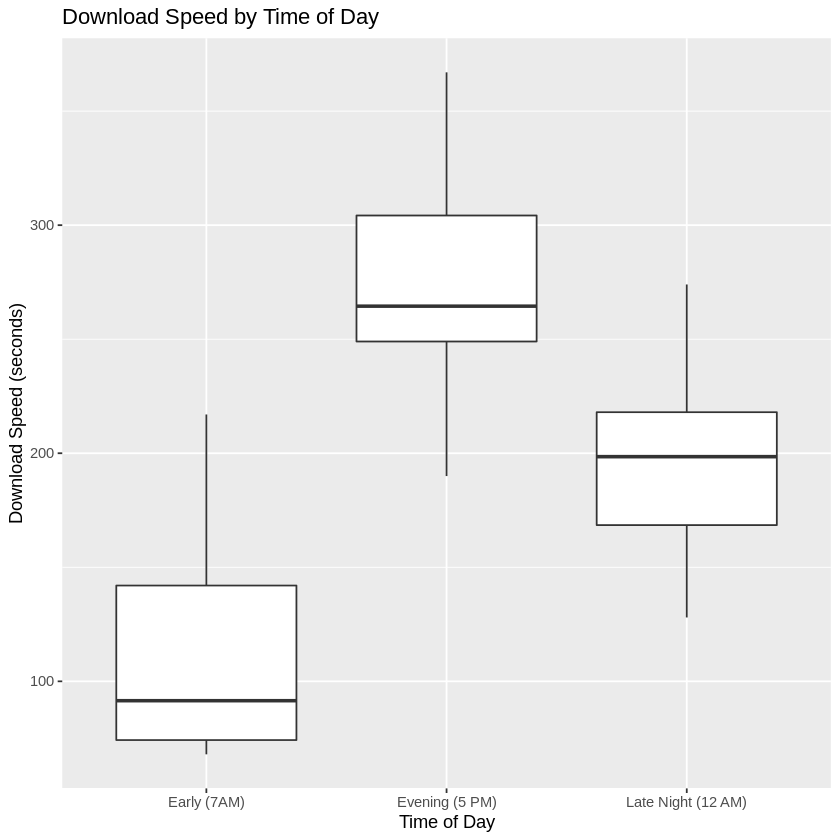

In [9]:
ggplot(downloading, aes(x = time, y = speed)) +
  geom_boxplot() +
  labs(title = "Download Speed by Time of Day", x = "Time of Day", y = "Download Speed (seconds)")

# Basic observations:
- Evening (5 PM) has the highest median download time and the widest spread, indicating more variability.
- Early (7 AM) generally has the lowest download times.
- Late Night (12 AM) is intermediate in terms of download time and variability.

#### 4. (b) How would we model this?

Fit a regression to these data that uses `speed` as the response and `time` as the predictor. Print the summary. Notice that the result is actually *multiple* linear regression, not simple linear regression. The model being used here is:

\begin{align*}
Y_i = \beta_0 + \beta_1 X_{i,1} + \beta_2 X_{i,2} + \varepsilon_i
\end{align*}

where 

1. $X_{i,1} = 1$ if the $i^{th}$ download is made in the evening (5 pm).
2.  $X_{i,2} = 1$ if the $i^{th}$ download is made at night (12 am).

Note: If $X_{i,1} = 0$ and $X_{i,2} = 0$, then the $i^{th}$ download is made in the morning (7am).

**To confirm this is the model being used, write out the explicit equation for your model - using the parameter estimates from part (a) - and print out it's design matrix.**

In [10]:
model <- lm(speed ~ time, data = downloading)
summary(model)


Call:
lm(formula = speed ~ time, data = downloading)

Residuals:
    Min      1Q  Median      3Q     Max 
-83.312 -34.328  -5.187  26.250 103.625 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)              113.37      11.79   9.619 1.73e-12 ***
timeEvening (5 PM)       159.94      16.67   9.595 1.87e-12 ***
timeLate Night (12 AM)    79.69      16.67   4.781 1.90e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 47.15 on 45 degrees of freedom
Multiple R-squared:  0.6717,	Adjusted R-squared:  0.6571 
F-statistic: 46.03 on 2 and 45 DF,  p-value: 1.306e-11


In [11]:
model.matrix(model)

,(Intercept),timeEvening (5 PM),timeLate Night (12 AM)
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,1,0,0
10,1,0,0


#### 4. (c) Only two predictors?

We have three categories, but only two predictors. Why is this the case? To address this question, let's consider the following model:

$$ Y_i = \beta_0 + \beta_1 X_{i,1} + \beta_2 X_{i,2} + \beta_2 X_{i,3} + \varepsilon_i $$

where 

1. $X_{i,1} = 1$ if the $i^{th}$ download is made in the evening (5 pm).
2. $X_{i,2} = 1$ if the $i^{th}$ download is made at night (12 am).
3. $X_{i,3} = 1$ if the $i^{th}$ download is made in the morning (7 am).

**Construct a design matrix to fit this model to the response, `speed`. Determine if something is wrong with it. Hint: Analyze the design matrix.**

In a categorical model, one category serves as the baseline (7 AM here),
and the other categories are compared against it. Adding a third predictor would create multicollinearity (i.e., X1 + X2 + X3 = 1).




In [12]:
# Design matrix with three predictors
three_predictors <- model.matrix(~ time + 0, data = downloading)
colnames(three_predictors) <- c("Evening", "Late Night", "Morning")
three_predictors

,Evening,Late Night,Morning
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,1,0,0
10,1,0,0


Observations: Adding the third predictor creates a linear dependency among columns.

#### 4. (d) Interpretation

Interpret the coefficients in the model from **4.b**. In particular:

1. What is the difference between the mean download speed at 7am and the mean download speed at 5pm?
2. What is the mean download speed (in seconds) in the morning?
3. What is the mean download speed (in seconds) in the evening?
4. What is the mean download speed (in seconds) at night?

In [13]:
coef_summary <- summary(model)$coefficients
coef_summary

# Mean download speed differences:
# 1. Difference between mean download speed at 7 AM and 5 PM
difference_7AM_5PM <- coef_summary[2, 1]

# 2. Mean download speed at 7 AM
mean_7AM <- coef_summary[1, 1]

# 3. Mean download speed at 5 PM
mean_5PM <- mean_7AM + difference_7AM_5PM

# 4. Mean download speed at 12 AM
mean_12AM <- mean_7AM + coef_summary[3, 1]

# Print results
cat("Difference between 7 AM and 5 PM:", difference_7AM_5PM, "seconds\n")
cat("Mean download speed at 7 AM:", mean_7AM, "seconds\n")
cat("Mean download speed at 5 PM:", mean_5PM, "seconds\n")
cat("Mean download speed at 12 AM:", mean_12AM, "seconds\n")

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),113.3750,11.78630,9.619220,1.729710e-12
timeEvening (5 PM),159.9375,16.66834,9.595285,1.866544e-12
timeLate Night (12 AM),79.6875,16.66834,4.780769,1.901709e-05


Difference between 7 AM and 5 PM: 159.9375 seconds
Mean download speed at 7 AM: 113.375 seconds
Mean download speed at 5 PM: 273.3125 seconds
Mean download speed at 12 AM: 193.0625 seconds
